In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import sys
import os

This dataset is from Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019. This dataset consists several key parameter of graduate admission. Dataset 2 is collected from https://github.com/deedy/gradcafe_data/blob/master/college_agg_phd.csv.  Dataset 2 contains 130 different universities with specific undergraduate GPA, and GRE score. By Visualizing two dataset, it is clear that standariezd score are highly related to acceptance rate, and dataset 2 shows the accpetance rate for univeristies which has more than 3000 applicants.

In [13]:
df = pd.read_csv("Admission_Predict_1.csv")
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


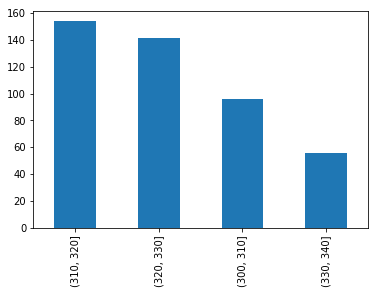

In [14]:
bins = [300,310,320,330,340]
a = pd.cut(df["GRE Score"], bins = bins)
a.value_counts().plot(kind = "bar")

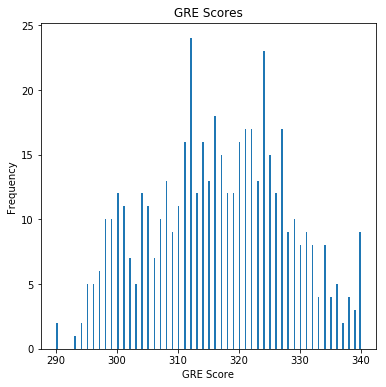

In [23]:
df["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

In [18]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [19]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

From here we can see there is no missing slot from the dataset

In [20]:
df.drop(columns=['Serial No.'],inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


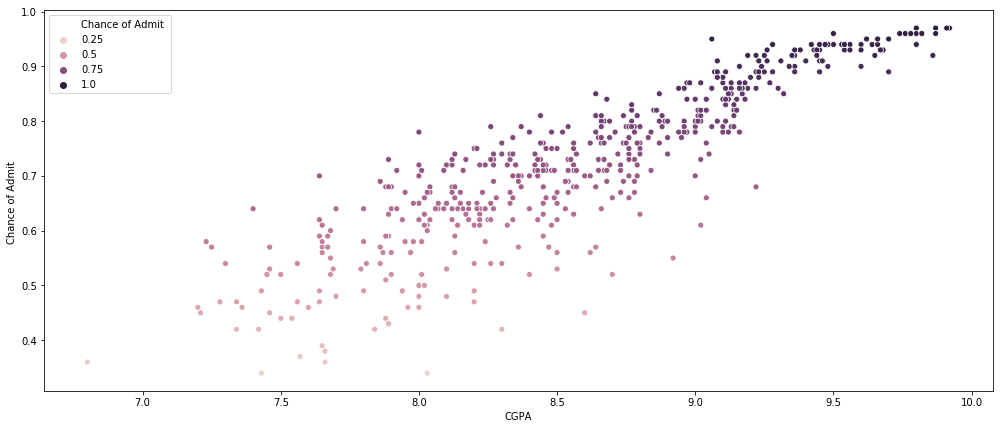

In [21]:
plt.figure(figsize=(17,7))
sns.scatterplot(df['CGPA'],df['Chance of Admit '],hue=df['Chance of Admit '])


From here we can see the higher the undergraduate GPA, the higher chance the acceptance chance will be

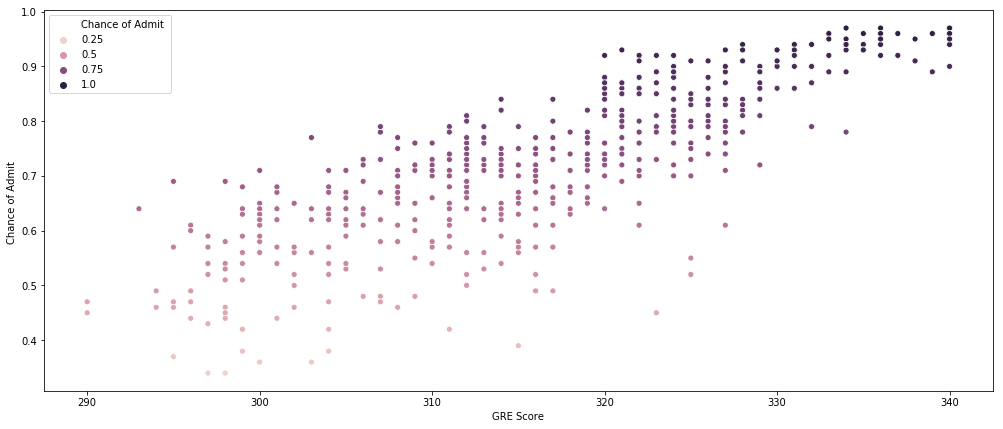

In [26]:
plt.figure(figsize=(17,7))
sns.scatterplot(df['GRE Score'],df['Chance of Admit '],hue=df['Chance of Admit '])

From the visuliza graph, we can see that the higher the GRE score is the higher the Admission chance will be. However, there are several data point that diverges from the main trend, but the overall trends indicated the Correlations between GRE score and admission chance 

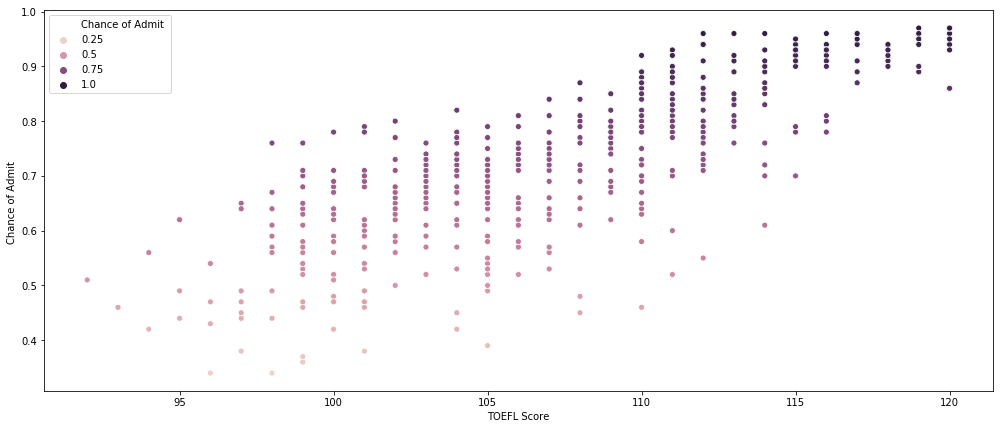

In [27]:
plt.figure(figsize=(17,7))
sns.scatterplot(df['TOEFL Score'],df['Chance of Admit '],hue=df['Chance of Admit '])

Overall trends indicates that the higher the TOFEL score the higher chance will be. However, comnpared to GRE and undergradute GPA, TOFEL is obviously less related with chance of admission. More data visualizations required to find out more detailed realationship betweem TOFEL and admission chance 

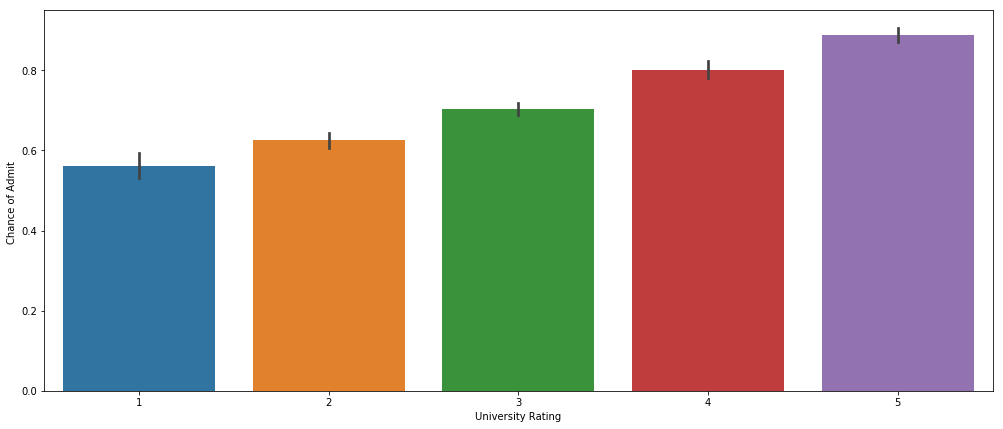

In [29]:
plt.figure(figsize=(17,7))
sns.barplot(df['University Rating'],df['Chance of Admit '])

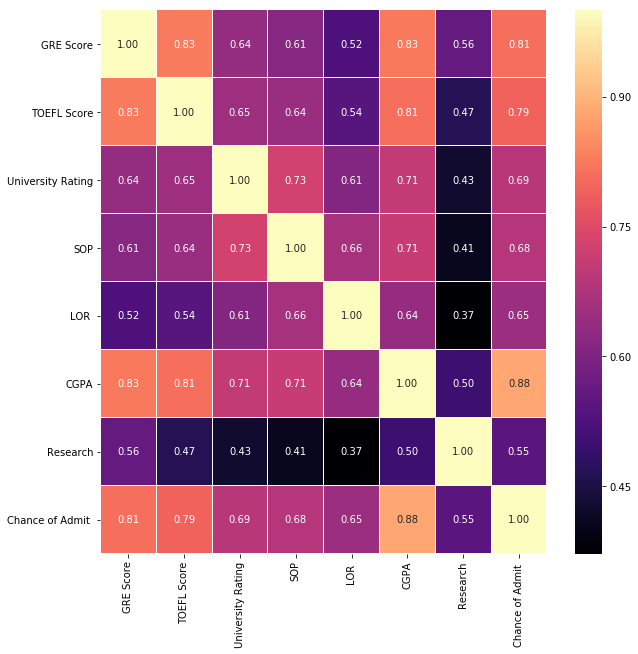

In [22]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

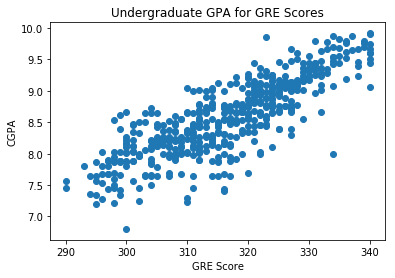

In [25]:
plt.scatter(df["GRE Score"],df.CGPA)
plt.title("Undergraduate GPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

From this plot, it is obvious that students who got higher GRE score also had higher undergraduate GPA

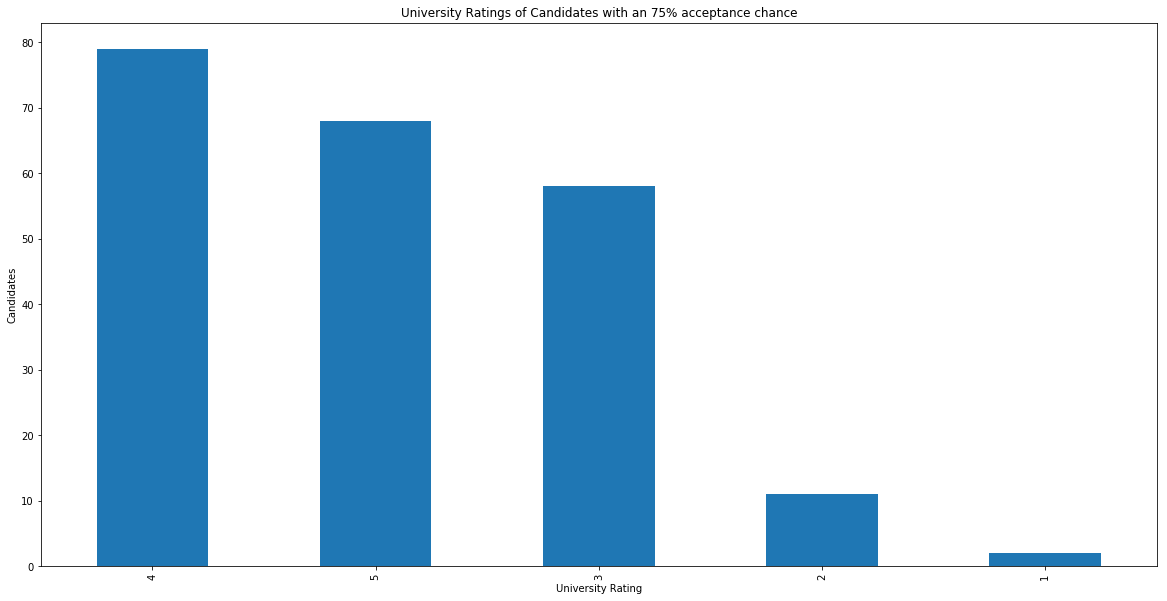

In [27]:
s = df[df["Chance of Admit "] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()


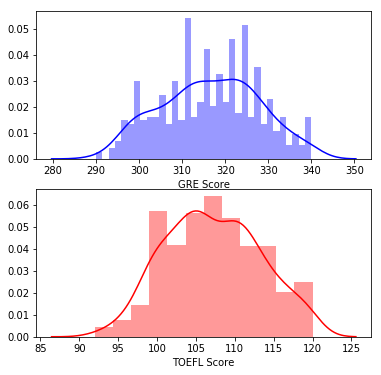

In [28]:
plt.figure(figsize=(6,6))
plt.subplot(2, 1, 1)
sns.distplot(df['GRE Score'],bins=34,color='blue')
plt.subplot(2, 1, 2)
sns.distplot(df['TOEFL Score'],bins=12,color='red')

From this two plots, we can see that most applicants tend to achieve 310 and above for GRE, and 100 and above for TOFEL

In [30]:
toppers=df[(df['GRE Score']>=320) & (df['TOEFL Score']>=110) & (df['CGPA']>=9.5)].sort_values(by=['Chance of Admit '],ascending=False)
toppers

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
202,340,120,5,4.5,4.5,9.91,1,0.97
24,336,119,5,4.0,3.5,9.80,1,0.97
203,334,120,5,4.0,5.0,9.87,1,0.97
143,340,120,4,4.5,4.0,9.92,1,0.97
385,335,117,5,5.0,5.0,9.82,1,0.96
384,340,113,4,5.0,5.0,9.74,1,0.96
71,336,112,5,5.0,5.0,9.76,1,0.96
81,340,120,4,5.0,5.0,9.50,1,0.96
130,339,114,5,4.0,4.5,9.76,1,0.96
148,339,116,4,4.0,3.5,9.80,1,0.96


In [70]:
toppers=df[(df['GRE Score']>=320) & (df['TOEFL Score']>=110) & (df['CGPA']>=9.5)].sort_values(by=['Chance of Admit '],ascending=False)
toppers

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
202,340,120,5,4.5,4.5,9.91,1,0.97
24,336,119,5,4.0,3.5,9.80,1,0.97
203,334,120,5,4.0,5.0,9.87,1,0.97
143,340,120,4,4.5,4.0,9.92,1,0.97
385,335,117,5,5.0,5.0,9.82,1,0.96
384,340,113,4,5.0,5.0,9.74,1,0.96
71,336,112,5,5.0,5.0,9.76,1,0.96
81,340,120,4,5.0,5.0,9.50,1,0.96
130,339,114,5,4.0,4.5,9.76,1,0.96
148,339,116,4,4.0,3.5,9.80,1,0.96


I take out the applicants who got higher than 320 in GRE, and higher than 110 in TOFEL, and all selected applicants have more than 89% chance to be admitted, and this proved that the higher the standardized score the higher chance of admission.

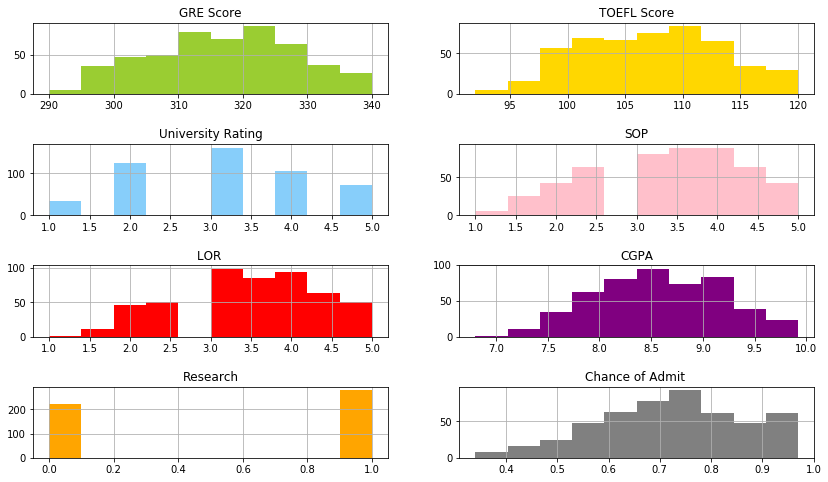

In [33]:
category = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']
color = ['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(4):
    
    if start == True:
        fig = plt.figure(figsize=(14,8))
        start = False
        
    plt.subplot2grid((4,2),(i,0))
    df[category[2*i]].hist(color=color[2*i],bins=10)
    plt.title(category[2*i])
    plt.subplot2grid((4,2),(i,1))
    df[category[2*i+1]].hist(color=color[2*i+1],bins=10)
    plt.title(category[2*i+1])
    
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)    
plt.show()

Above plots indicate the distribution for all parameter for this dataset.

Here is the second data which contained 130 univeristies with the more detialed distribution on standrized score 

From this two plots, we can see that most applicants tend to achieve 310 and above for GRE, and 100 and above for TOFEL

In [46]:
df2 = pd.read_clipboard()
df2 

,University Name,Number Of Reportees,Number Of Acceptances And Rejections Reported,Acceptance Rate,Number Reporting GRE and GPA,Undergraduate GPA (25 percentile),Undergraduate GPA 50 percentile),Undergraduate GPA (75 percentile),GRE Verbal (25th Percentile),GRE Verbal (50th Percentile),GRE Verbal (75th Percentile),GRE Quant (25th Percentile),GRE Quant (50th Percentile),GRE Quant (75th Percentile)
0,Stanford University,6666,5860,0.240785,1002,3.8000,3.900,3.9850,159.00,164.0,168.00,164.00,168.0,170.00
1,"University Of California, Berkeley (UCB)",5875,5272,0.274848,692,3.8000,3.900,3.9600,160.00,164.0,168.00,163.25,166.0,169.00
2,Columbia University,5605,4480,0.292857,631,3.7200,3.850,3.9300,159.00,164.0,168.00,161.75,166.0,169.00
3,"University Of Michigan, Ann Arbor (UMich)",5595,4509,0.353737,826,3.6825,3.830,3.9400,158.00,162.0,166.00,161.00,165.0,168.00
4,Cornell University,5550,4669,0.332619,772,3.7050,3.870,3.9500,157.50,163.0,167.00,161.00,165.0,169.00
5,"University Of California, Los Angeles (UCLA)",5000,4229,0.428707,666,3.6400,3.800,3.9200,157.00,162.0,167.00,161.00,165.0,168.00
6,University Of Chicago (UChicago),4787,3981,0.306456,627,3.7300,3.865,3.9600,161.00,165.0,168.00,162.00,166.0,170.00
7,University Of Pennsylvania (UPenn),4704,3722,0.278076,523,3.7000,3.860,3.9500,159.00,163.0,167.00,161.00,166.0,169.00
8,"University Of Washington, Seattle (UW)",4644,3871,0.372514,855,3.6650,3.810,3.9400,158.00,163.0,166.00,160.00,164.0,168.00
9,Harvard University,4431,3771,0.285070,406,3.7175,3.850,3.9525,162.75,166.0,168.25,163.00,167.0,170.00


In [47]:
df2.head(10)

,University Name,Number Of Reportees,Number Of Acceptances And Rejections Reported,Acceptance Rate,Number Reporting GRE and GPA,Undergraduate GPA (25 percentile),Undergraduate GPA 50 percentile),Undergraduate GPA (75 percentile),GRE Verbal (25th Percentile),GRE Verbal (50th Percentile),GRE Verbal (75th Percentile),GRE Quant (25th Percentile),GRE Quant (50th Percentile),GRE Quant (75th Percentile)
0,Stanford University,6666,5860,0.240785,1002,3.8000,3.900,3.9850,159.00,164.0,168.00,164.00,168.0,170.0
1,"University Of California, Berkeley (UCB)",5875,5272,0.274848,692,3.8000,3.900,3.9600,160.00,164.0,168.00,163.25,166.0,169.0
2,Columbia University,5605,4480,0.292857,631,3.7200,3.850,3.9300,159.00,164.0,168.00,161.75,166.0,169.0
3,"University Of Michigan, Ann Arbor (UMich)",5595,4509,0.353737,826,3.6825,3.830,3.9400,158.00,162.0,166.00,161.00,165.0,168.0
4,Cornell University,5550,4669,0.332619,772,3.7050,3.870,3.9500,157.50,163.0,167.00,161.00,165.0,169.0
5,"University Of California, Los Angeles (UCLA)",5000,4229,0.428707,666,3.6400,3.800,3.9200,157.00,162.0,167.00,161.00,165.0,168.0
6,University Of Chicago (UChicago),4787,3981,0.306456,627,3.7300,3.865,3.9600,161.00,165.0,168.00,162.00,166.0,170.0
7,University Of Pennsylvania (UPenn),4704,3722,0.278076,523,3.7000,3.860,3.9500,159.00,163.0,167.00,161.00,166.0,169.0
8,"University Of Washington, Seattle (UW)",4644,3871,0.372514,855,3.6650,3.810,3.9400,158.00,163.0,166.00,160.00,164.0,168.0
9,Harvard University,4431,3771,0.285070,406,3.7175,3.850,3.9525,162.75,166.0,168.25,163.00,167.0,170.0


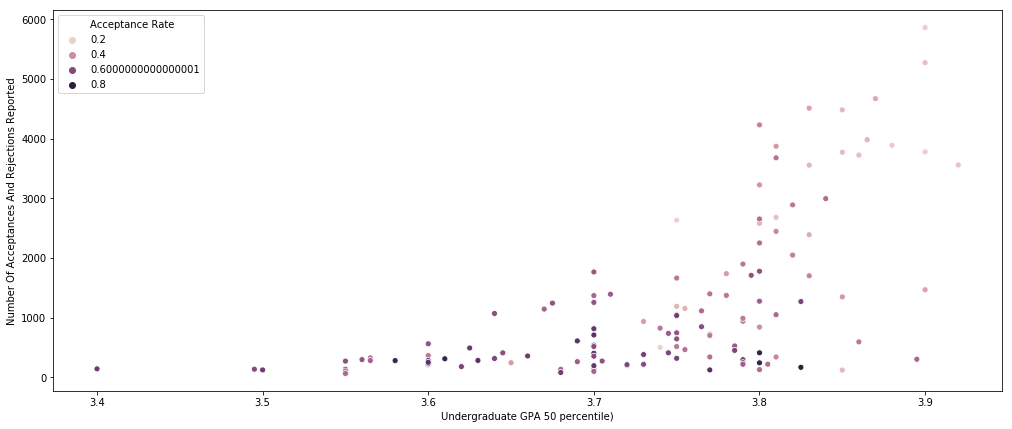

In [69]:
plt.figure(figsize=(17,7))
sns.scatterplot(df2['Undergraduate GPA 50 percentile)'],df2['Number Of Acceptances And Rejections Reported'],hue=df2['Acceptance Rate'])

From this scatter plot we can see that the higher the number of applicants the higher undergraduate GPA will be, and such results indicates that universities which has high applicants are generally more competitive and has higher median UGPA 

In [77]:
toppers=df2[(df2['Undergraduate GPA 50 percentile)']>=3.7) & (df2['GRE Verbal (50th Percentile)']>=160) & (df2['GRE Quant (50th Percentile)']>=160) & (df2['Number Of Acceptances And Rejections Reported']>=2000)].sort_values(by=['Acceptance Rate'],ascending=True)
toppers

,University Name,Number Of Reportees,Number Of Acceptances And Rejections Reported,Acceptance Rate,Number Reporting GRE and GPA,Undergraduate GPA (25 percentile),Undergraduate GPA 50 percentile),Undergraduate GPA (75 percentile),GRE Verbal (25th Percentile),GRE Verbal (50th Percentile),GRE Verbal (75th Percentile),GRE Quant (25th Percentile),GRE Quant (50th Percentile),GRE Quant (75th Percentile)
23,Brown University,3080,2632,0.234422,311,3.6000,3.750,3.9050,157.00,163.0,166.00,161.00,166.0,168.0
0,Stanford University,6666,5860,0.240785,1002,3.8000,3.900,3.9850,159.00,164.0,168.00,164.00,168.0,170.0
10,Yale University,4351,3776,0.246557,390,3.7225,3.900,3.9700,158.00,164.0,167.00,161.00,165.0,169.0
12,Princeton University,4298,3887,0.251865,480,3.7350,3.880,3.9600,160.00,164.0,168.00,163.00,167.0,169.0
14,Massachusetts Institute Of Technology (MIT),4140,3557,0.267641,457,3.8125,3.920,3.9875,160.00,164.0,167.00,164.00,168.0,170.0
21,Duke University,3352,2679,0.273983,383,3.6000,3.810,3.9400,158.00,162.0,167.00,163.00,166.0,169.0
1,"University Of California, Berkeley (UCB)",5875,5272,0.274848,692,3.8000,3.900,3.9600,160.00,164.0,168.00,163.25,166.0,169.0
7,University Of Pennsylvania (UPenn),4704,3722,0.278076,523,3.7000,3.860,3.9500,159.00,163.0,167.00,161.00,166.0,169.0
9,Harvard University,4431,3771,0.285070,406,3.7175,3.850,3.9525,162.75,166.0,168.25,163.00,167.0,170.0
2,Columbia University,5605,4480,0.292857,631,3.7200,3.850,3.9300,159.00,164.0,168.00,161.75,166.0,169.0


Here are universities which has more than 2000 applicants, and the data is arranged from lower accpetance rate to higher acceptance rate. Therefore, it is obvious that the lower the accpetance is the higher other parameter such as GRE score and GPA are higher.